In [35]:
import pandas as pd

In [36]:
data = pd.read_csv('iris.csv', encoding='latin1')

In [37]:
print(len(data))
print(data[:5])

150
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [38]:
print("품종 종류:", data["variety"].unique(), sep='\n')

품종 종류:
['Setosa' 'Versicolor' 'Virginica']


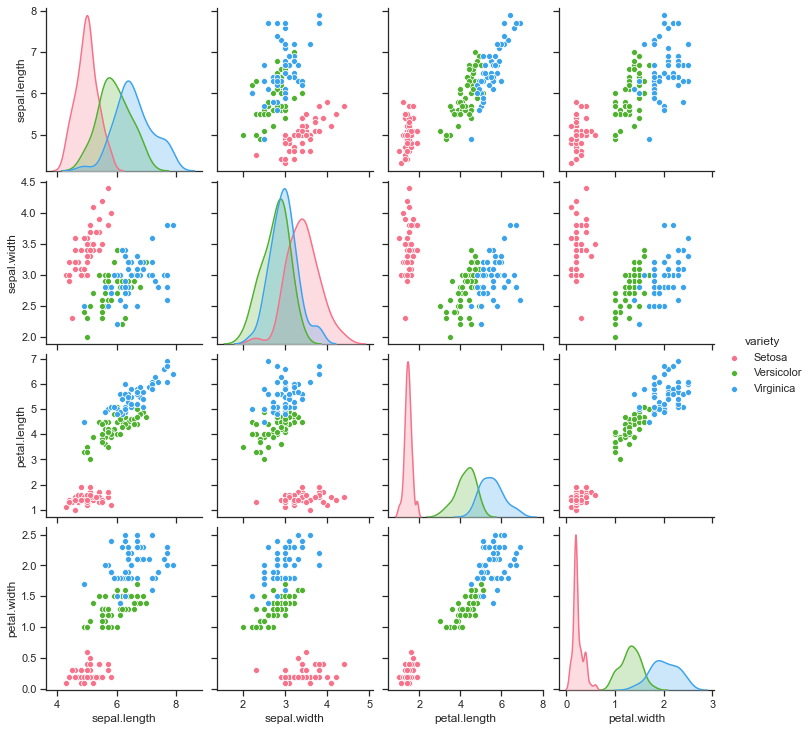

In [39]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue='variety', palette='husl')

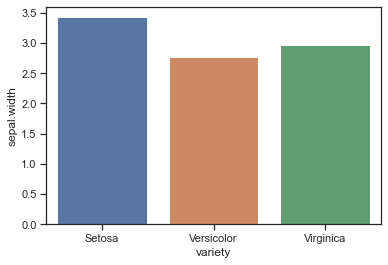

In [40]:
sns.barplot(data['variety'], data['sepal.width'], ci=None)

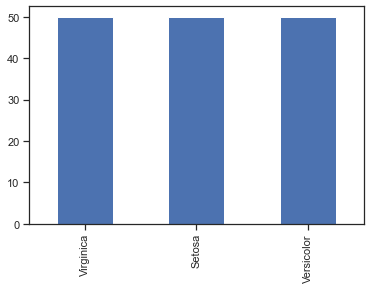

In [41]:
import matplotlib.pyplot as plt
data['variety'].value_counts().plot(kind='bar')

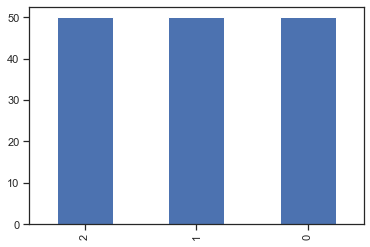

In [42]:
data['variety'] = data['variety'].replace(['Setosa', 'Versicolor', 'Virginica'], [0,1,2])
data['variety'].value_counts().plot(kind='bar')

In [43]:
from sklearn.model_selection import train_test_split
data_X = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
data_y = data['variety'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [45]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras import optimizers

In [48]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
history=model.fit(X_train,y_train, batch_size=1, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
120/120 [==============================] - 0s 1ms/step - loss: 2.8594 - accuracy: 0.3083 - val_loss: 1.7426 - val_accuracy: 0.4333
Epoch 2/200
120/120 [==============================] - 0s 467us/step - loss: 2.0118 - accuracy: 0.3000 - val_loss: 1.3156 - val_accuracy: 0.4000
Epoch 3/200
120/120 [==============================] - 0s 475us/step - loss: 1.3699 - accuracy: 0.2917 - val_loss: 1.1022 - val_accuracy: 0.4000
Epoch 4/200
120/120 [==============================] - 0s 450us/step - loss: 1.0662 - accuracy: 0.4583 - val_loss: 1.0835 - val_accuracy: 0.3000
Epoch 5/200
120/120 [==============================] - 0s 458us/step - loss: 0.9759 - accuracy: 0.4917 - val_loss: 1.0627 - val_accuracy: 0.3000
Epoch 6/200
120/120 [==============================] - 0s 467us/step - loss: 0.9238 - accuracy: 0.5750 - val_loss: 1.0233 - val_accuracy: 0.3667
Epoch 7/200
120/120 [==============================] - 0s 458us/step - loss: 0.8813 - accuracy: 0.6000 - val_loss: 0.9661 - val_accu

120/120 [==============================] - 0s 450us/step - loss: 0.3449 - accuracy: 0.9083 - val_loss: 0.4204 - val_accuracy: 0.8333
Epoch 56/200
120/120 [==============================] - 0s 458us/step - loss: 0.3415 - accuracy: 0.9333 - val_loss: 0.4241 - val_accuracy: 0.8000
Epoch 57/200
120/120 [==============================] - 0s 442us/step - loss: 0.3401 - accuracy: 0.9000 - val_loss: 0.4098 - val_accuracy: 0.8333
Epoch 58/200
120/120 [==============================] - 0s 450us/step - loss: 0.3347 - accuracy: 0.9333 - val_loss: 0.4165 - val_accuracy: 0.8333
Epoch 59/200
120/120 [==============================] - 0s 458us/step - loss: 0.3339 - accuracy: 0.9083 - val_loss: 0.4135 - val_accuracy: 0.8333
Epoch 60/200
120/120 [==============================] - 0s 450us/step - loss: 0.3308 - accuracy: 0.9250 - val_loss: 0.4154 - val_accuracy: 0.8333
Epoch 61/200
120/120 [==============================] - 0s 458us/step - loss: 0.3307 - accuracy: 0.9250 - val_loss: 0.4014 - val_accuracy

120/120 [==============================] - 0s 467us/step - loss: 0.2332 - accuracy: 0.9583 - val_loss: 0.2928 - val_accuracy: 0.9333
Epoch 112/200
120/120 [==============================] - 0s 458us/step - loss: 0.2318 - accuracy: 0.9667 - val_loss: 0.3025 - val_accuracy: 0.9333
Epoch 113/200
120/120 [==============================] - 0s 450us/step - loss: 0.2315 - accuracy: 0.9583 - val_loss: 0.2964 - val_accuracy: 0.9333
Epoch 114/200
120/120 [==============================] - 0s 467us/step - loss: 0.2324 - accuracy: 0.9500 - val_loss: 0.2903 - val_accuracy: 0.9333
Epoch 115/200
120/120 [==============================] - 0s 467us/step - loss: 0.2293 - accuracy: 0.9583 - val_loss: 0.2943 - val_accuracy: 0.9333
Epoch 116/200
120/120 [==============================] - 0s 467us/step - loss: 0.2269 - accuracy: 0.9583 - val_loss: 0.2889 - val_accuracy: 0.9333
Epoch 117/200
120/120 [==============================] - 0s 458us/step - loss: 0.2285 - accuracy: 0.9500 - val_loss: 0.2808 - val_ac

Epoch 167/200
120/120 [==============================] - 0s 467us/step - loss: 0.1784 - accuracy: 0.9750 - val_loss: 0.2354 - val_accuracy: 0.9333
Epoch 168/200
120/120 [==============================] - 0s 475us/step - loss: 0.1788 - accuracy: 0.9667 - val_loss: 0.2374 - val_accuracy: 0.9333
Epoch 169/200
120/120 [==============================] - 0s 475us/step - loss: 0.1768 - accuracy: 0.9667 - val_loss: 0.2259 - val_accuracy: 0.9333
Epoch 170/200
120/120 [==============================] - 0s 467us/step - loss: 0.1746 - accuracy: 0.9667 - val_loss: 0.2404 - val_accuracy: 0.9333
Epoch 171/200
120/120 [==============================] - 0s 458us/step - loss: 0.1754 - accuracy: 0.9750 - val_loss: 0.2418 - val_accuracy: 0.9333
Epoch 172/200
120/120 [==============================] - 0s 458us/step - loss: 0.1751 - accuracy: 0.9667 - val_loss: 0.2349 - val_accuracy: 0.9333
Epoch 173/200
120/120 [==============================] - 0s 467us/step - loss: 0.1749 - accuracy: 0.9667 - val_loss: 0

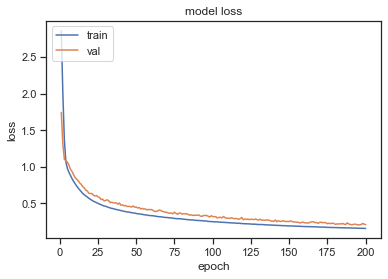

In [51]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [52]:
print("\n테스트 정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 1ms/step - loss: 0.2092 - accuracy: 0.9333

테스트 정확도 : 0.9333
